In [1]:
from sklearn import datasets
import numpy as np

In [2]:
# Loads the iris data into jupyer's memory.
iris = datasets.load_iris()

In [3]:
# iris is a list of lists. [:, [0,1]] is getting the entire 
# list of list and for each list getting only index 2 and 3.

# Indexes Sepal Length, Sepal Width
X_case_0 = iris.data[:, [0, 1]]
y = iris.target
# The np.unique(y) function returned the three unique class labels stored in
# iris.target, and as we see, the Iris flower class names Iris-setosa, 
# Irisversicolor, and Iris-virginica are already stored as integers 
# (here: 0, 1, 2).
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [4]:
# To evaluate how well a trained model performs on unseen data, 
# we will further split the dataset into separate training and 
# test datasets
from sklearn.model_selection import train_test_split

X_train_case_0, X_case_test_0, y_train, y_test = train_test_split(
    X_case_0, y, test_size=0.3, random_state=1, stratify=y)

# bincount() counts the number of unique items.  
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
# Here, we will standardize the features using the StandardScaler class 
# from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Using the fit method, StandardScaler estimated the parameters 
# μ (sample mean) and σ (standard deviation) for each feature dimension
sc = StandardScaler()
sc.fit(X_train_case_0)

# from the training data
# Note that we used the same scaling parameters to standardize the test 
# set so that both the values in the training and test dataset are 
# comparable to each other
X_train_std_0 = sc.transform(X_train_case_0)
X_test_std_0 = sc.transform(X_case_test_0)

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
    resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


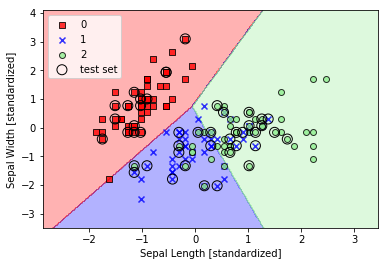

Accuracy: 0.76


In [7]:
# Training a logistic regression model with scikitlearn
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std_0, X_test_std_0))
y_combined = np.hstack((y_train, y_test))

# Here we are training the model using the training data. 
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std_0, y_train)

# visual representation
plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=lr, 
                      test_idx=range(105, 150))

plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Sepal Width [standardized]')
plt.legend(loc='upper left')
plt.show()

# The scikit-learn library also implements a large variety of different 
# performance metrics that are available via the metrics module. 
# For example, we can calculate the classification accuracy of the 
# perceptron on the test set as follows:
from sklearn.metrics import accuracy_score
y_pred_case_0 = lr.predict_proba(X_test_std_0).argmax(axis=1)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_case_0))

In [44]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import log_loss


# Here is a more general function for the code above.. 
def train_Ir_model(X, y, feature_names, max_iter_n, C, show_graph):
    """Training the linear regression model and graphing the data
    Parameters. Takes the X array and splits the data into training 
    data and testing data. The testing data is then used to show 
    accuracy.
    ----------
    X : array-like, shape = [n_samples, n_features]
        n_samples the number of samples
        n_features the number of features for each sample.
        
    y : array-like, shape = [n_samples]
        n_sample target values.
        
    feature_names : array shape = [n_feature_names]
        A list of feature names
        
    max_iter_n : max number of iterations for training the model.
    
    C : Float Inverse of regularization strength; must be a positive float. 
        Like in support vector machines, smaller values specify stronger regularization.
        
    show_graph : boolean if true graph will be displayed.
        
    Return 
        float number representing accuracy
        Displays a visual representation of the training model.
        Displays the accuracy of the model. 
    
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y)

    sc = StandardScaler()
    sc.fit(X_train)

    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))

    lr = LogisticRegression(C=C, random_state=1, max_iter=max_iter_n)
    lr.fit(X_train_std, y_train)
    
    if show_graph:
        plot_decision_regions(X_combined_std, 
                              y_combined, 
                              classifier=lr, 
                              test_idx=range(105, 150))

        plt.xlabel(feature_names[0] + ' [standardized]')
        plt.ylabel(feature_names[1] + ' [standardized]')
        plt.legend(loc='upper left')
        plt.show()

    y_prediction = lr.predict_proba(X_test_std)
    y_pred = y_prediction.argmax(axis=1)
    loss=log_loss(y_test, y_prediction, normalize=False)
    return accuracy_score(y_test, y_pred), loss;

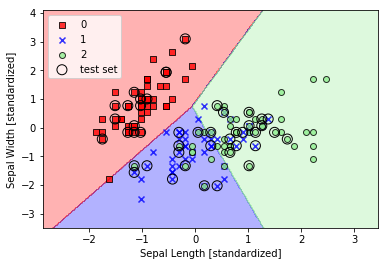

Accuracy: 0.76
Accuracy: 26.739562894630055


In [45]:
X = iris.data[:, [0, 1]]
accuracy, loss = train_Ir_model(X,y,["Sepal Length", "Sepal Width"], 100, 100.0, True)
print('Accuracy: %.2f' % accuracy)
print('Accuracy: ' + str(loss))


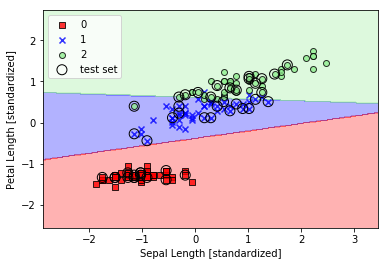

Accuracy: 0.96


In [10]:
X = iris.data[:, [0, 2]]
accuracy,loss = train_Ir_model(X,y,["Sepal Length", "Petal Length"],100, 100.0, True)
print('Accuracy: %.2f' % accuracy)

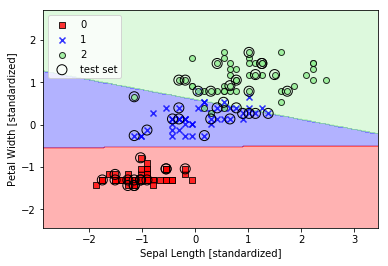

Accuracy: 0.96


In [11]:
X = iris.data[:, [0, 3]]
accuracy,loss = train_Ir_model(X,y,["Sepal Length", "Petal Width"], 100, 100.0, True)
print('Accuracy: %.2f' % accuracy)

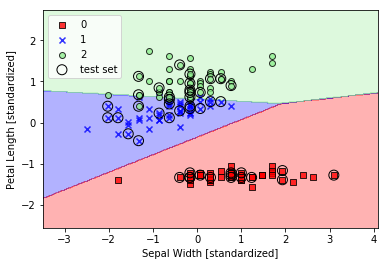

Accuracy: 0.98


In [12]:
X = iris.data[:, [1, 2]]
accuracy,loss = train_Ir_model(X,y,["Sepal Width", "Petal Length"], 100, 100.0, True)
print('Accuracy: %.2f' % accuracy)

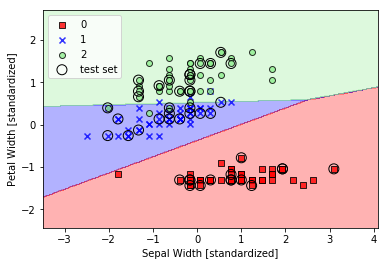

Accuracy: 1.00


In [13]:
X = iris.data[:, [1, 3]]
accuracy,loss = train_Ir_model(X,y,["Sepal Width", "Petal Width"], 100, 100.0, True)
print('Accuracy: %.2f' % accuracy)

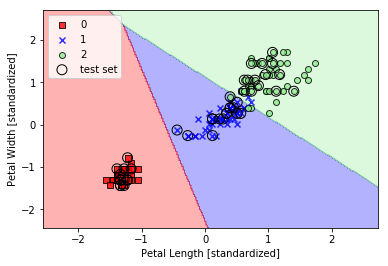

Accuracy: 0.98


In [14]:
X = iris.data[:, [2, 3]]
accuracy,loss = train_Ir_model(X,y,["Petal Length", "Petal Width"], 100, 100.0, True)
print('Accuracy: %.2f' % accuracy)

In [39]:
X = iris.data
print("Features used : Sepal Length, Sepal Width, Petal Length and Petal Width")
accuracy,loss = train_Ir_model(X,y,["Sepal Length, Sepal Width, Petal Length, Petal Width"], 100, 100.0, False)
print('Accuracy: %.2f' % accuracy)


Features used : Sepal Length, Sepal Width, Petal Length and Petal Width
7.908973089799056
Accuracy: 0.98


C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

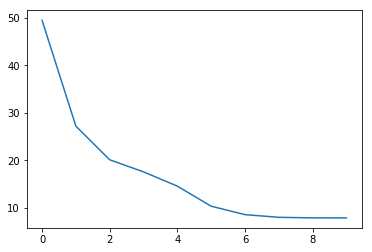

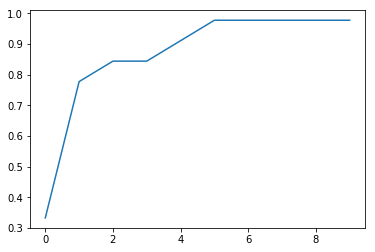

In [49]:
# Converges based on accuracy.
accuracy_list = []
loss_list = []
for n in range(0,10):
    X = iris.data
    percent_accuracy,loss = train_Ir_model(X,y,["Sepal Length, Sepal Width, Petal Length, Petal Width"], n, 100.0, False)
    loss_list.append(loss) 
    accuracy_list.append(percent_accuracy)
    
n_iter = [n for n in range(0,10)]


plt.plot(n_iter, loss_list)
plt.show()
plt.plot(n_iter, accuracy_list)
plt.show()

In [ ]:
# Converges based on accuracy.
accuracy = []
for n in range(0,10):
    X = iris.data[:, [0, 1]]
    accuracy.append(train_Ir_model(X,y,["Sepal Length", "Sepal Width"], n, 100.0, False))
    
n_iter = [n for n in range(0,10)]


plt.plot(n_iter, accuracy)
plt.show()

In [ ]:
# Converges based on accuracy.
accuracy = []
for n in range(0,10,2):
    X = iris.data[:, [0, 3]]
    accuracy.append(train_Ir_model(X,y,["Sepal Length", "Petal Width"], n, 100.0, False))
    
n_iter = [n for n in range(0,10,2)]

plt.plot(n_iter, accuracy)
plt.show()